# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from utils import feature_normalize, linearReg_cost_function, linearReg_gradient
from utils import train_linearReg, learning_curve, poly_features, validation_curve
plt.style.use("ggplot")
%matplotlib inline

In [3]:
data = loadmat("data/ex5data1.mat")
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

In [4]:
X = data['X']
y = data['y']
Xtest = data['Xtest']
ytest = data['ytest']
Xval = data['Xval']
yval = data['yval']

In [5]:
# m = number of examples and n = number of features
m, n = X.shape
print(f"We have {m} training examples")
print(f"we have {n} feature(s)")

We have 12 training examples
we have 1 feature(s)


# Visualize training data

Text(0, 0.5, 'Water flowing out of the dam (y)')

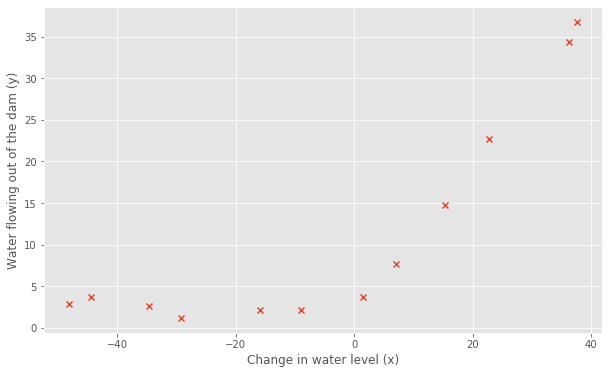

In [6]:
# Plot training data
plt.figure(figsize=(10,6))
plt.scatter(X, y, marker='x', linewidths=1.5)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

# Regularized Linear Regression Cost

In [7]:
theta = np.array([1, 1])
J = linearReg_cost_function(theta, np.insert(X, 0, 1, axis=1), y, 1)

print(f'Cost at theta = [1, 1]: {J}')

Cost at theta = [1, 1]: 303.9931922202643


In [8]:
grad = linearReg_gradient(theta, np.insert(X, 0, 1, axis=1), y, 1)

print(f'Gradient at theta = [1, 1]: {grad[0,:]}, {grad[1,:]}')

Gradient at theta = [1, 1]: [-15.30301567], [598.25074417]


# Train Linear Regression

In [9]:
lambd = 0
theta = train_linearReg(np.insert(X, 0, 1, axis=1), y, lambd)

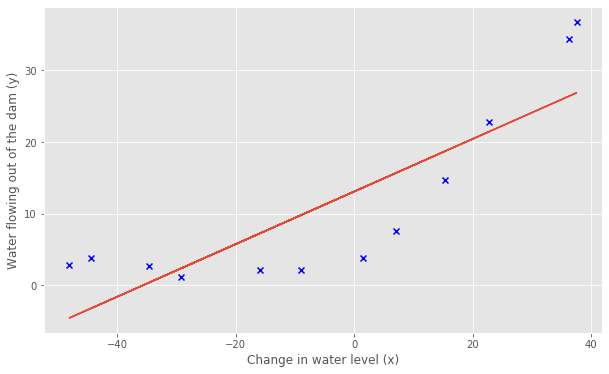

In [10]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, marker='x', c='b', linewidths=1.5)
plt.xlabel('Change in water level (x)');
plt.ylabel('Water flowing out of the dam (y)');
plt.plot(X, np.insert(X, 0, 1, axis=1).dot(theta))

# Learning Curve for Linear Regression

In [11]:
lambd = 0
train_error, val_error = learning_curve(np.insert(X, 0, 1, axis=1), y,
                                        np.insert(Xval, 0, 1, axis=1),
                                        yval, lambd)

Text(0, 0.5, 'Error')

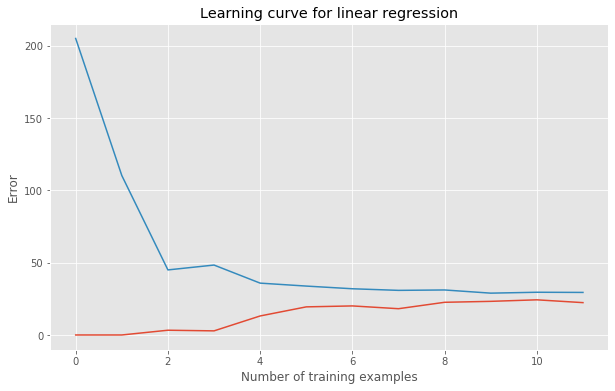

In [12]:
plt.figure(figsize=(10,6))
xaxis = list(range(m))
plt.plot(xaxis, train_error, xaxis, val_error)
plt.title('Learning curve for linear regression')
plt.xlabel('Number of training examples')
plt.ylabel('Error')

In [13]:
for i in range(m):
    print(f"{i+1}\t {train_error[i]:.6f}\t {val_error[i]:.6f}\t")

1	 0.000000	 205.121096	
2	 0.000000	 110.302641	
3	 3.286595	 45.010231	
4	 2.842678	 48.368911	
5	 13.154049	 35.865165	
6	 19.443963	 33.829961	
7	 20.098522	 31.970986	
8	 18.172859	 30.862446	
9	 22.609405	 31.135998	
10	 23.261462	 28.936207	
11	 24.317250	 29.551432	
12	 22.373906	 29.433818	


# Feature Mapping for Polynomial Regression

In [14]:
p = 8
# Map X onto Polynomial Features and Normalize
X_poly = poly_features(X, p)
(X_poly, mu, sigma) = feature_normalize(X_poly)  # Normalize
print(f"Normalized Training Example 1:\n{X_poly[0, :]}")

Normalized Training Example 1:
[-0.3782437  -0.78866232  0.19032872 -0.7375913   0.32025197 -0.6171516
  0.35983501 -0.53109126]


In [15]:
# Map X_poly_test and normalize using (mu and sigma)
X_poly_test = poly_features(Xtest, p)
X_poly_test = X_poly_test - mu
X_poly_test = X_poly_test / sigma

In [16]:
# Map X_poly_val and normalize using (mu and sigma)
X_poly_val = poly_features(Xval, p)
X_poly_val = X_poly_val - mu
X_poly_val = X_poly_val / sigma

In [17]:
lambd = 10
theta = train_linearReg(np.insert(X_poly, 0, 1, axis=1), y, lambd)

In [18]:
min_X, max_X= np.min(X), np.max(X)
x = np.array(np.arange(min_X-15, max_X+26, 0.05))
x = np.reshape(x, (-1, 1), order='F')
X_pol = poly_features(x, p)
X_pol = (X_pol - mu) / sigma
X_pol = np.insert(X_pol, 0, 1, axis=1)

Text(0.5, 1.0, 'Polynomial Regression Fit (lambda = 10)')

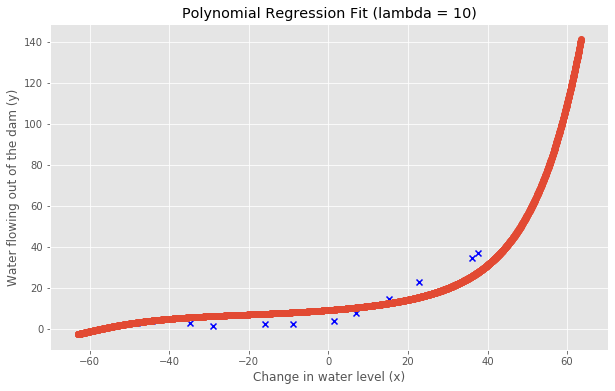

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, marker='x', c='b', linewidths=1.5)
plt.scatter(x, X_pol.dot(theta), linewidths=1)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title (f'Polynomial Regression Fit (lambda = {lambd})')

In [20]:
train_error, val_error = learning_curve(np.insert(X_poly, 0, 1, axis=1), y,
                                        np.insert(X_poly_val, 0, 1, axis=1),
                                        yval, lambd)

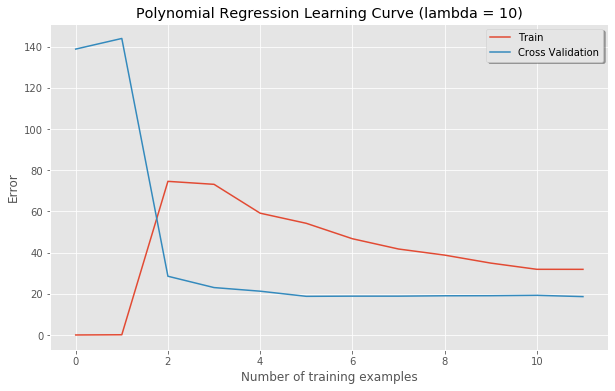

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(xaxis, train_error, xaxis, val_error)
ax.set_xlabel('Number of training examples')
ax.set_ylabel('Error')
ax.set_title(f'Polynomial Regression Learning Curve (lambda = {lambd})')
ax.legend(['Train', 'Cross Validation'], loc=1, frameon=True, shadow=True)

In [22]:
for i in range(m):
    print(f"{i+1}\t {train_error[i]:.6f}\t {val_error[i]:.6f}\t")

1	 0.000000	 138.846777	
2	 0.108491	 144.007003	
3	 74.611380	 28.523387	
4	 73.166196	 23.023412	
5	 59.147974	 21.263844	
6	 54.236533	 18.766775	
7	 46.742359	 18.854466	
8	 41.751426	 18.854335	
9	 38.785990	 19.039800	
10	 34.910274	 19.073323	
11	 31.891494	 19.258808	
12	 31.878154	 18.633921	


# Validation for Selecting Lamdba

In [23]:
lambda_vec, train_err, val_err = validation_curve(np.insert(X_poly, 0, 1, axis=1), y,
                                                  np.insert(X_poly_val, 0, 1, axis=1), yval)

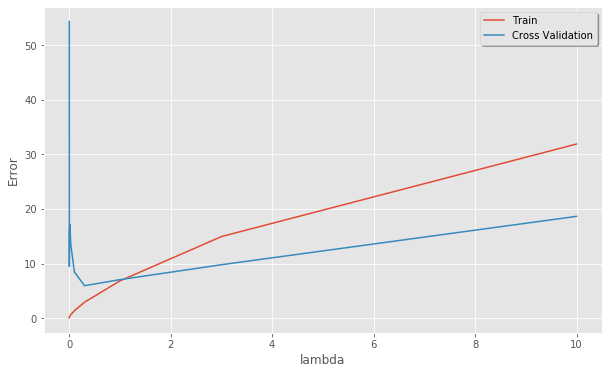

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(lambda_vec, train_err, lambda_vec, val_err)
ax.set_xlabel('lambda')
ax.set_ylabel('Error')
ax.legend(['Train', 'Cross Validation'], loc=1, frameon=True, shadow=True)

In [25]:
for i, lambd in enumerate(lambda_vec):
    print(f"{lambd}\t {train_err[i]:.6f}\t {val_err[i]:.6f}\t")

0	 0.028892	 54.313337	
0.001	 0.169422	 9.473723	
0.003	 0.243172	 15.971702	
0.01	 0.371282	 17.234317	
0.03	 0.636703	 13.421484	
0.1	 1.360572	 8.453627	
0.3	 2.917649	 5.932016	
1	 6.830463	 7.047218	
3	 14.937646	 9.782191	
10	 31.878154	 18.633921	


## lambd = 1 is a reasonable choice for this problem

Text(0.5, 1.0, 'Polynomial Regression Fit (lambda = 1)')

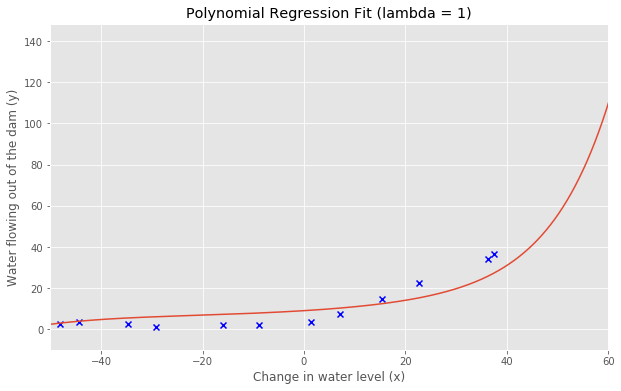

In [26]:
lambd = 1
plt.figure(figsize=(10,6))
plt.scatter(X, y, marker='x', c='b', linewidths=2)
min_X, max_X= np.min(X), np.max(X)
x = np.array(np.arange(min_X-15, max_X+26, 0.05))
x = np.reshape(x, (-1, 1), order='F')
X_pol = poly_features(x, p)
X_pol = (X_pol - mu) / sigma
X_pol = np.insert(X_pol, 0, 1, axis=1)
plt.plot(x, X_pol.dot(theta))
plt.xlim(right=60)
plt.xlim(left=-50)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title (f'Polynomial Regression Fit (lambda = {lambd})')